In [55]:
import os
import re
import requests
import shutil
import openai
from PIL import Image

## Assign API key and create Client object

In [3]:
openai.api_key = os.getenv('OPENAI_API_KEY')
client = openai.Client()

## Create Api prompt

In [25]:
def create_dish_prompt(list_of_ingredients):
    prompt = f"Create a detailed recipe based on only the following ingredients: {', '.join(list_of_ingredients)}.\n" \
             + f"Additionally, assign a title starting with 'Recipe Title: ' to this dish, which can be used to create a photorealistic image of it. "
    return prompt

In [26]:
prompt = create_dish_prompt(['Pasta', 'canned tomatoes', 'beans', 'cheese'])
print(prompt)

Create a detailed recipe based on only the following ingredients: Pasta, canned tomatoes, beans, cheese.
Additionally, assign a title starting with 'Recipe Title: ' to this dish, which can be used to create a photorealistic image of it. 


# Get recipe and extract title

In [27]:
response = client.chat.completions.create(
            model='gpt-4o-mini',
            messages=[
                {
                    'role': 'user',
                    'content': prompt
                }
            ],
            temperature=0.7,
            max_tokens=512,
            top_p=1.0,
            frequency_penalty=0,
            presence_penalty=0
        )

In [29]:
def extract_title(recipe):
    return re.findall("^.*Recipe Title: .*$", recipe, re.MULTILINE)[0].strip().split("Recipe Title: ")[1]

In [31]:
recipe_title = extract_title(response.choices[0].message.content)
print(recipe_title)

Cheesy Pasta with Tomato Bean Medley**


# Make image prompt and prompt for image

In [38]:
def image_prompt(recipe_title):
    prompt = f"'{recipe_title}', professional food photography, 15mm, studio lighting\""
    return prompt

In [42]:
image_response = client.images.generate(
  model="dall-e-2",
  prompt=image_prompt(recipe_title),
  size="1024x1024",
  quality="standard",
  n=1,
)

In [46]:
image_url = image_response.data[0].url

In [47]:
def save_image(image_url, file_name):
    image_res = requests.get(image_url, stream = True)
    
    if image_res.status_code == 200:
        with open(file_name,'wb') as f:
            shutil.copyfileobj(image_res.raw, f)
    else:
        print("Error downloading image!")
    return image_res.status_code

In [49]:
save_image(image_url, 'food.png')

200

# View Recipe

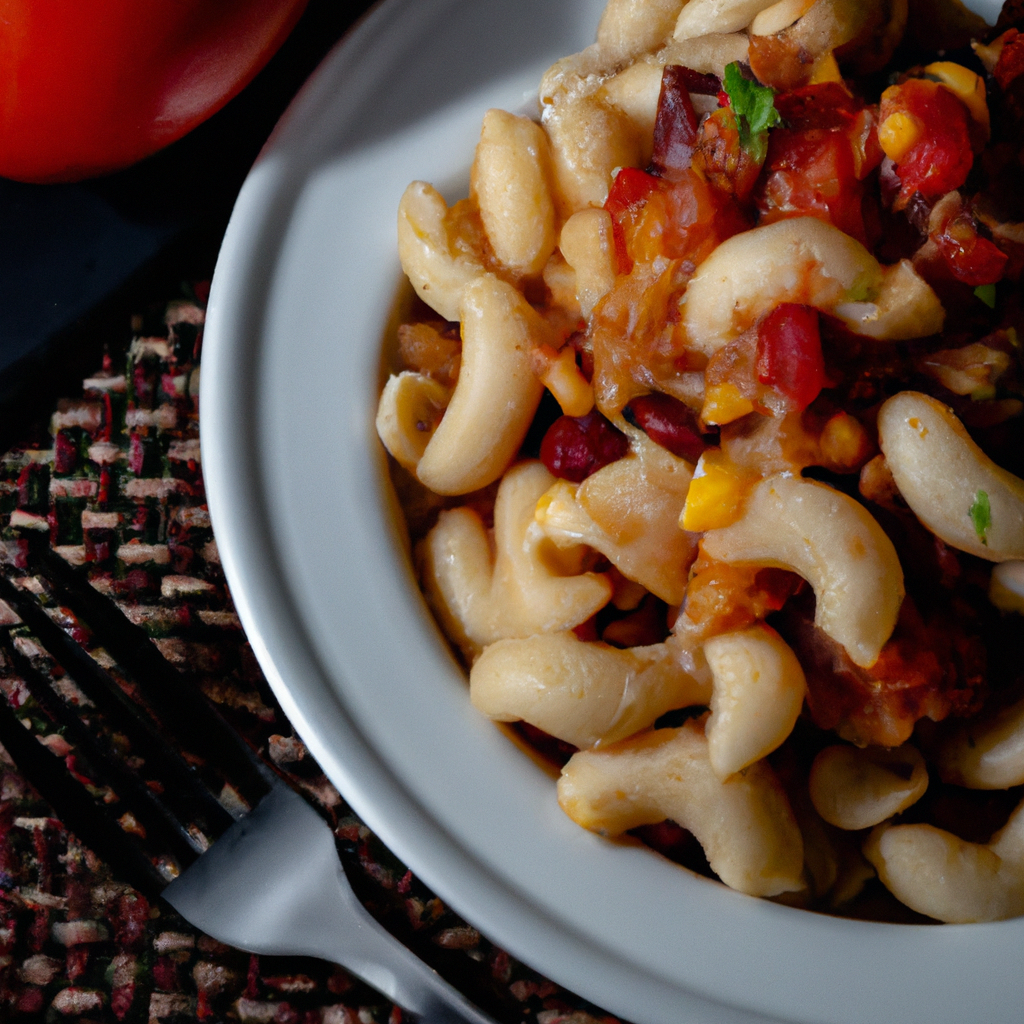

In [50]:
Image.open('food.png')

In [56]:
recipe_text = print(response.choices[0].message.content)
print(recipe_text)

**Recipe Title: Cheesy Pasta with Tomato Bean Medley**

**Ingredients:**
- 8 oz pasta (any type: penne, fusilli, or spaghetti would work well)
- 1 can (14 oz) diced tomatoes (with herbs or plain)
- 1 can (15 oz) beans (such as cannellini, black, or kidney beans, drained and rinsed)
- 1 cup shredded cheese (mozzarella, cheddar, or a blend)
- Salt and pepper to taste
- Optional: Olive oil, garlic, onion, and fresh herbs (basil or parsley) for garnish

**Instructions:**

1. **Cook the Pasta:**
   - Bring a large pot of salted water to a boil. Add the pasta and cook according to package instructions until al dente. Reserve about 1 cup of pasta water, then drain the pasta and set aside.

2. **Prepare the Sauce:**
   - In a large skillet over medium heat, add a drizzle of olive oil (about 1-2 tablespoons). If using, add 1 diced onion and 2 minced garlic cloves; sauté until softened and fragrant, about 3-4 minutes.
   - Pour in the canned diced tomatoes with their juices. Stir to combine and 